In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and Explore the Data

In [2]:
file_path = "C:\Programming\hands-on-projects\day2-beijing+pm2+5+data\PRSA_data_2010.1.1-2014.12.31.csv"

df = pd.read_csv(file_path)

In [3]:
print(df.dtypes)
df.tail()

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [4]:
df['day'] = df['day'].astype(str)
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)
df['hour'] = df['hour'].astype(str)
df.dtypes
print(len(df))

43824


In [5]:
df['Date'] = df['year'] + '/' + df['month'] + '/' + df['day'] + ' ' + df['hour'] + ':00' + ':00'
df['Date'] = pd.to_datetime(df['Date'])
df = df.fillna(method='bfill')
# df = df.interpolate(method='bfill', order=5, limit_direction ='backward', limit_area='outside')
print(len(df))
# df = df.groupby('Date').mean()
# df['Date'] = df.index
# df.reset_index(inplace = True, drop = True)

df.head()

43824


C:\Users\sinah\AppData\Local\Temp\ipykernel_32292\2767903798.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
0,1,2010,1,1,0,129.0,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,129.0,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,129.0,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,129.0,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,129.0,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [6]:
df.dtypes

No                int64
year             object
month            object
day              object
hour             object
pm2.5           float64
DEWP              int64
TEMP            float64
PRES            float64
cbwd             object
Iws             float64
Is                int64
Ir                int64
Date     datetime64[ns]
dtype: object

0.0
994.0
2010-01-01 00:00:00
2014-12-31 23:00:00


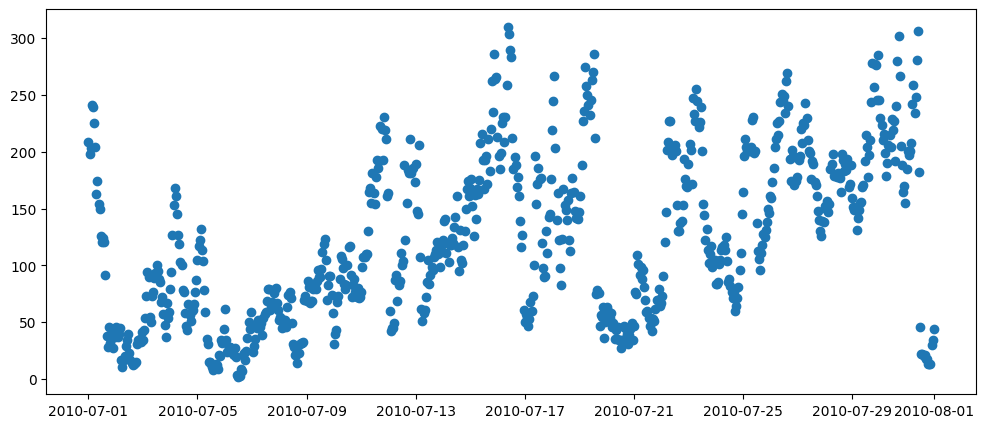

In [7]:
print(df['pm2.5'].min())
print(df['pm2.5'].max())
print(df['Date'].min())
print(df['Date'].max())

range = (df['Date'] >= '2010-07-01 00:00:00') & (df['Date'] <= '2010-08-01 00:00:00')
# df.drop('hour', axis=1, inplace= True)

plt.figure(figsize=(12, 5))
plt.scatter(df.loc[range]['Date'], df.loc[range]['pm2.5'], label='Actual')

In [8]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
0,1,2010,1,1,0,129.0,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,129.0,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,129.0,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,129.0,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,129.0,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


# Normalize the Features

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
model = scaler.fit(df[['DEWP','TEMP','PRES','Iws','Is','Ir']])
scaled_df = model.transform(df[['DEWP','TEMP','PRES','Iws','Is','Ir']])

print(scaled_df)

stand = StandardScaler()
model2 = stand.fit(df[['DEWP','TEMP','PRES','Iws','Is','Ir']])
stand_df = model2.transform(df[['DEWP','TEMP','PRES','Iws','Is','Ir']])

print(stand_df)

[[0.27941176 0.13114754 0.54545455 0.00229001 0.         0.        ]
 [0.27941176 0.1147541  0.52727273 0.00763907 0.         0.        ]
 [0.27941176 0.13114754 0.50909091 0.01069811 0.         0.        ]
 ...
 [0.26470588 0.26229508 0.78181818 0.41399641 0.         0.        ]
 [0.26470588 0.24590164 0.78181818 0.42086644 0.         0.        ]
 [0.27941176 0.26229508 0.78181818 0.4262155  0.         0.        ]]
[[-1.58087789 -1.92225045  0.44332765 -0.44189385 -0.06935299 -0.13766709]
 [-1.58087789 -2.00422792  0.3459432  -0.37930644 -0.06935299 -0.13766709]
 [-1.58087789 -1.92225045  0.24855876 -0.34351365 -0.06935299 -0.13766709]
 ...
 [-1.65016223 -1.26643069  1.70932538  4.37533654 -0.06935299 -0.13766709]
 [-1.65016223 -1.34840816  1.70932538  4.45572036 -0.06935299 -0.13766709]
 [-1.58087789 -1.26643069  1.70932538  4.51830776 -0.06935299 -0.13766709]]


#  LSTM Windowing Function

In [10]:
# Creating Sequences

def lstm_sequences(df, target_col_index, window_size=24, horizon=1):

    """
    Create sequences of data for LSTM input.

    Parameters:
    -----------
    data : np.ndarray
        Scaled data array of shape (num_samples, num_features)
    target_col_index : int
        Index of the target column (e.g., PM2.5) in data
    window_size : int
        Number of past time steps to include in each input sequence
    horizon : int
        How far ahead to predict (e.g., 1 for next hour)

    Returns:
    --------
    X : np.ndarray
        Shape = (num_sequences, window_size, num_features)
    y : np.ndarray
        Shape = (num_sequences,)
    """

    x = []
    y = []
    for i in range(len(df)-window_size - horizon + 1):
        x_i = df[i: i+window_size]
        y_i = df[i+window_size+horizon-1, target_col_index]
        x.append(x_i)
        y.append(y_i)
        
    x = np.array(x)
    y = np.array(y)
    return x, y  



# Long short-term memory (LSTM) RNN in Tensorflow

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [12]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(1)) # Predict 1 value: PM2.5

model.compile(optimozer='adam', loss='mean_squared_error')
model.summary()

NameError: name 'x_train' is not defined

## Training and Evaluating the Model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False, # Why no shuffle? Time sequence matters. You want the LSTM to learn in chronological order.
    verbose=1
)

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

rmse = np.sqrt(np.mean((y_test - predictions)**2))
print(f'RMSE: {rmse:.2f}')

# Make Predictions and Plot

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('LSTM: Actual vs Predicted PM2.5')

In [2]:
print(13)

13


In [10]:
import re

pattern = r'^[^?]*\??[^?]*$'

print(2 if re.match(pattern, "What is the capital of France. Paris is the capital???") else 1)  # Example usage
re.match(pattern, "What is the capital of France. Paris is the capital.")  #
re.match(pattern, "What is the capital of France? Paris is the capital? It is known for its art, fashion, and culture.")  # Should match

1


In [ ]:
def climb_stairs(n):
    if n <= 2:
        return n
    i, j = 1, 2
    for _ in range(3, n + 1):
        i, j = j, i + j 
    return j

False